# Linear Regression: Inverse Matrix Method

This script explores how to accomplish linear regression with TensorFlow using the matrix inverse.

Given the system $ A \cdot x = y $, the matrix inverse way of linear regression (equations for overdetermined systems) is given by solving for x as follows.

$$x = \left( A^{T} \cdot A \right)^{-1} \cdot A^{T} \cdot y$$

As a reminder, here, $x$ is our parameter matrix (vector of length $F+1$, where $F$ is the number of features). Here, $A$, our design matrix takes the form

$$
A=
\begin{bmatrix}
    1 & x_{11} & x_{12} & \dots  & x_{1F} \\
    1 & x_{21} & x_{22} & \dots  & x_{2F} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \dots  & x_{nF}
\end{bmatrix}
$$

Where $F$ is the number of independent features, and $n$ is the number of points.  For an overdetermined system, $n>F$. Remember that one observed point in our system will have length $F+1$ and the $i^{th}$ point will look like

$$point_{i} = \left( y_{i}, x_{i1}, x_{i2}, \dots, x_{iF} \right)$$

For this recipe, we will consider only a 2-dimensional system ($F=1$), so that we can plot the results at the end.

We start by loading the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Next we start a graph session.

In [2]:
sess = tf.Session()

For illustration purposes, we randomly generate data to fit.

The x-values will be a sequence of 100 evenly spaced values between 0 and 100.

The y-values will fit to the line: $y=x$, but we will add normally distributed error according to $N(0,1)$.

In [15]:
# Create the data
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

In [16]:
y_vals

array([ 1.38738321,  1.69260258, -0.06211126,  0.16133544,  0.08987157,
       -0.33856052, -0.2953487 ,  0.3201886 ,  1.30087219,  0.22916424,
        1.5755113 ,  2.34627394,  3.92589795,  0.74335538,  2.32923999,
        2.83843895,  1.70030129,  2.06095089,  1.49597753,  0.7861268 ,
        2.48636499,  3.26993488,  4.02819873,  2.9590004 ,  3.2413135 ,
        3.69020191,  2.28515519,  1.40875642,  3.12454363,  4.09810145,
        2.79012836,  2.57532709,  3.70042213,  4.45296158,  3.72308481,
        4.27373547,  1.57419574,  4.23912531,  3.11279788,  3.72135099,
        3.61386684,  3.14036752,  4.86635444,  4.36037744,  3.52243432,
        4.02181971,  5.30099153,  6.13084292,  2.42731943,  5.4088504 ,
        5.34199073,  5.45070531,  5.98099598,  5.15899633,  2.62959422,
        4.45510828,  5.8591117 ,  4.25963438,  6.29777172,  5.46797588,
        5.69377164,  5.60018677,  7.2876915 ,  6.05721954,  6.40869653,
        7.66079375,  6.45769134,  5.8831752 ,  7.26881329,  7.08

We create the design matrix, $A$, which will be a column of ones and the x-values.

In [10]:
x_vals

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [11]:
# Create design matrix
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

In [14]:
A

matrix([[ 0.        ,  1.        ],
        [ 0.1010101 ,  1.        ],
        [ 0.2020202 ,  1.        ],
        [ 0.3030303 ,  1.        ],
        [ 0.4040404 ,  1.        ],
        [ 0.50505051,  1.        ],
        [ 0.60606061,  1.        ],
        [ 0.70707071,  1.        ],
        [ 0.80808081,  1.        ],
        [ 0.90909091,  1.        ],
        [ 1.01010101,  1.        ],
        [ 1.11111111,  1.        ],
        [ 1.21212121,  1.        ],
        [ 1.31313131,  1.        ],
        [ 1.41414141,  1.        ],
        [ 1.51515152,  1.        ],
        [ 1.61616162,  1.        ],
        [ 1.71717172,  1.        ],
        [ 1.81818182,  1.        ],
        [ 1.91919192,  1.        ],
        [ 2.02020202,  1.        ],
        [ 2.12121212,  1.        ],
        [ 2.22222222,  1.        ],
        [ 2.32323232,  1.        ],
        [ 2.42424242,  1.        ],
        [ 2.52525253,  1.        ],
        [ 2.62626263,  1.        ],
        [ 2.72727273,  1.   

We now create the y-values as a matrix with Numpy.

After we have the y-values and the design matrix, we create tensors from them.

In [5]:
# Format the y matrix
y = np.transpose(np.matrix(y_vals))

# Create tensors
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

Now we solve for the parameter matrix with TensorFlow operations.

In [6]:
# Matrix inverse solution
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, y_tensor)

Run the solutions and extract the slope and intercept from the parameter matrix.

In [17]:
solution_eval = sess.run(solution)

# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

In [18]:
solution_eval

array([[ 1.02214199],
       [-0.05159534]])

Now we print the solution we found and create a best fit line.

In [8]:
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

slope: 1.0221419887050054
y_intercept: -0.05159534218211437


We use Matplotlib to plot the results.

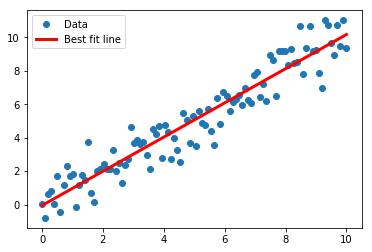

In [9]:
# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()